# **Project 2**

2017311974 통계학과 진수정

# 1. Import Library / Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
train = pd.read_csv("/content/drive/MyDrive/기계학습 AAI3006/Project/train.csv")
test = pd.read_csv("/content/drive/MyDrive/기계학습 AAI3006/Project/X_test.csv")

# 2. Data

In [113]:
train.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,label
0,0.159302,0.001206,0.095556,0.103968,0.241841,0.015937,0.380635,24.365636,0.175620,21.451660,23.824941,26.860989,5.409329,178.302275,118.805772,71.780979,60.595704,1.120236,0.456544,0.679286,1.030189,1.554274,0.874988,11.056342,5.862386,7.338043,4.313646,0.626464,0.695773,21.477432,0.693588,-0.327011,2.948707,2.301753,0.621157,-0.636670,1.357991,0.041140,1.294767,1.411157,...,0.013287,1553.790611,13.057997,17276.461014,0.000760,15273.899997,0.010718,1454.616107,0.333077,11.872866,0.153309,17.167801,0.121265,0.000749,2.103438e+01,0.000062,2.359656,0.082971,0.056775,38.786267,0.067508,39.441458,166082.362816,76.087625,93.992936,77.820486,36532.756730,19.835802,40.867942,0.001236,0.000041,0.073747,3.247842,1.524696,0.038395,0.007741,0.009176,0.002994,17.493596,0
1,0.078909,0.000098,0.097341,0.111471,0.152525,0.038076,0.521042,20.450413,0.180559,17.321590,20.874958,23.396257,6.074668,137.679613,87.802155,67.882583,52.059239,0.622723,0.416345,0.396978,0.559901,0.836382,0.439405,4.619568,2.419374,2.571888,1.489682,0.307432,0.502883,25.386675,0.305130,2.699263,1.668620,4.992532,1.532773,3.519948,2.028082,0.065575,1.384110,1.419527,...,0.005533,491.589328,0.276725,20300.495507,0.000696,10802.614674,0.008120,445.160892,0.125321,4.298156,0.011688,8.891616,0.006371,0.000527,1.106866e+07,0.000032,212.740090,0.012751,0.033280,24.012308,0.017846,21.320284,928.943139,41.933796,520.846650,41.720618,388.881196,15.238695,47.110117,0.000494,0.000053,

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Columns: 384 entries, emotion_angry_mean to label
dtypes: float64(383), int64(1)
memory usage: 1.2 MB


In [115]:
train.describe()

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,label
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,4.050000e+02,405.000000,405.000000,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,0.128547,0.001497,0.103264,0.254882,0.168895,0.049551,0.292277,29.346558,0.198189,25.019881,29.750026,33.620952,8.601071,208.711646,132.711805,90.526609,69.018507,1.258115,0.515119,0.713753,1.126770,1.789339,1.075586,13.890679,7.027224,8.748301,5.267168,0.969419,0.695642,23.821208,0.179616,-1.317826,-1.443551,9.544733,6.442474,-4.798155,-7.102119,0.056249,1.386572,1.333257,...,0.016716,1162.870068,56.391881,7.511756e+04,0.000661,26806.370329,0.017861,1097.405498,9.570555,21.781083,3.137460e+05,30.638778,117.956872,0.001032,1.116691e+05,0.000

In [116]:
test.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_amean_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max
0,0.155693,0.000225,0.077640,0.226517,0.208652,0.044869,0.285805,22.734337,0.204727,18.768689,22.825144,26.437933,7.669243,154.216004,120.644116,98.211368,75.855315,1.015353,0.517132,0.572970,0.892117,1.437425,0.864454,11.547967,6.075034,8.175721,4.964917,0.838042,0.816384,24.897853,0.527930,1.689141,-3.422121,14.106929,0.737629,3.275405,3.215152,0.076818,1.205838,1.659669,...,17982.470382,0.012680,616.083640,0.061312,6200.688869,0.000911,15808.225844,0.012500,591.961803,0.049908,7.843710,0.022597,14.797768,0.013479,0.000349,4330.337793,0.000049,0.019668,0.138786,0.069729,21.824390,0.018730,30.531802,307.571620,66.268935,268.242701,50.879484,667.047326,22.063426,34.789545,0.000287,0.000038,0.051829,2.445959,2.175879,0.027020,0.005952,0.003459,0.001186,15.198562
1,0.177189,0.000472,0.095150,0.250708,0.331609,0.024785,0.118970,32.708595,0.124259,29.709912,32.511974,35.718257,6.008345,136.941469,83.734519,74.981479,57.387060,1.922800,0.456558,1.177125,1.734119,2.672978,1.495853,18.064664,9.747658,13.769853,8.826276,1.329625,0.712600,21.362207,0.830010,-17.246966,-0.134327,15.995365,1.108757,-15.705268,-13.643544,0.036286,1.259429,1.129771,...,50304.793142,0.019419,2070.233673,34.576160,143758.858265,0.000785,42272.420261,0.015091,1995.585941,1.786308,19.838539,7821.411711,27.573449,4.331645,0.001032,4.839315,0.000077,7.919872,0.517096,0.040509,71.631249,0.293790,94.483504,52.795820,88.068110,106.725353,114.730813

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 383 entries, emotion_angry_mean to equivalentSoundLevel_dBp_max
dtypes: float64(383)
memory usage: 299.3 KB


In [118]:
test.describe()

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_amean_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.130530,0.001259,0.111251,0.240225,0.174231,0.060614,0.280994,29.831549,0.184108,25.977136,30.237794,33.694981,7.717845,200.137247,126.160145,88.269700,67.053252,1.263774,0.521559,0.703977,1.134282,1.811040,1.107064,14.390496,7.208966,8.987830,5.329163,0.947631,0.711742,23.709502,0.426252,-2.122609,7.727165,9.323139,-4.684764,-5.633869,4.734783,0.052558,1.389872,1.330136,...,25264.665519,0.016547,1183.764938,193.790041,70893.522345,0.000655,24190.041588,0.017427,1116.153772,197.313263,19.997582,745.250591,27.732052,8.348070,0.0

- 결측값 확인

In [119]:
# train, test 데이터셋에 대해 결측값 확인

print('train 데이터의 결측값 개수:',train.isnull().sum().sum())
print('test 데이터의 결측값 개수:',test.isnull().sum().sum())

train 데이터의 결측값 개수: 0
test 데이터의 결측값 개수: 0


- 데이터 균형 확인

In [120]:
print(train.label.value_counts() / len(train.label))

0    0.538272
1    0.461728
Name: label, dtype: float64


> 해당 데이터는 결측값이 없으며, 라벨이 balanced 된 데이터다.

- 하나의 유니크값으로 이루어진 칼럼 제거

In [121]:
one_uniq = [col for col in list(train) if train[col].nunique() <= 1]

In [122]:
train[one_uniq]

,number_faces_var,number_faces_min,emotion_disgust_min,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_min,StddevVoicedSegmentLengthSec_min,StddevUnvoicedSegmentLength_min,number_faces_max
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
400,0.0,1.0,0.0,0.0,0.0,0.0,0.0
401,0.0,1.0,0.0,0.0,0.0,0.0,0.0
402,0.0,1.0,0.0,0.0,0.0,0.0,0.0
403,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [123]:
train = train.drop(train[one_uniq],axis = 1)
test = test.drop(test[one_uniq],axis = 1)

> 하나의 유니크값으로 이루어진 피처는 예측에 도움이 되지 않는 의미없는 칼럼이므로, 해당 칼럼을 제거하였다.

 - X,Y 분할

In [124]:
X_train = train.drop('label',axis = 1)
Y_train = train['label']
X_test = test

- PCA

In [125]:
from sklearn.preprocessing import StandardScaler

data = pd.concat([X_train,X_test]) # 전체 데이터에 대해 pca 진행해야 함
data_std = StandardScaler().fit_transform(data)

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
data_pc = pca.fit(data_std)

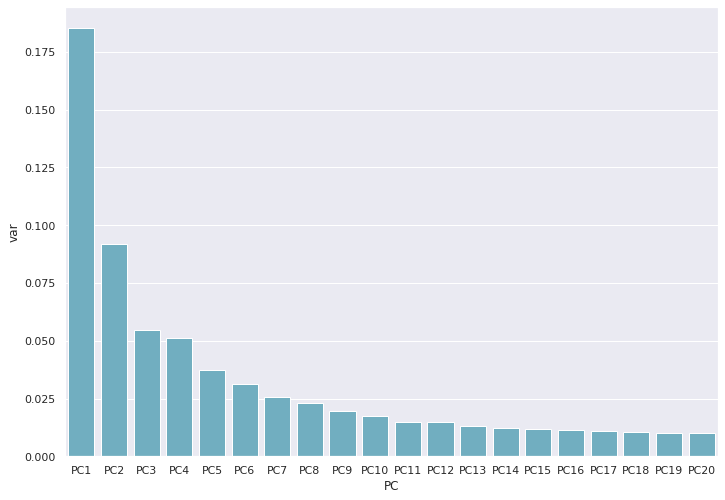

In [127]:
import seaborn as sns

df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20']})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'PC', y = "var", data = df, color = "c")

> Elbow point가 2이므로, 2개의 주성분만 추가

In [128]:
pca = PCA(n_components = 2)
data_pc = pca.fit_transform(data_std)
data_pc = pca.fit_transform(data_std)
data_pc = pd.DataFrame(data = data_pc,columns = ['PC1','PC2'])

In [129]:
# train, test 데이터셋으로 다시 분할
X_train_pc = data_pc.iloc[:405,:]
X_test_pc = data_pc.iloc[405:,:]
X_test_pc = X_test_pc.reset_index(drop = True)

- 피처간 상관관계 확인

In [130]:
# correlation matrix (absolute value)
r = train.drop('label',axis = 1).corr().abs()

In [131]:
upper = r.where(np.triu(np.ones(r.shape),k = 1).astype(np.bool))

In [132]:
upper = upper.unstack().dropna()

In [133]:
# corrleation coefficient >= 0.9
high_pairs = upper[upper >= 0.9]
high_pairs

F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean  F0semitoneFrom27.5Hz_sma3nz_amean_mean             0.949581
F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean  F0semitoneFrom27.5Hz_sma3nz_amean_mean             0.987436
                                                 F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean    0.924907
F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean  F0semitoneFrom27.5Hz_sma3nz_amean_mean             0.943665
                                                 F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean    0.945024
                                                                                                      ...   
StddevUnvoicedSegmentLength_max                  F3amplitudeLogRelF0_sma3nz_amean_mean              0.901240
                                                 MeanUnvoicedSegmentLength_mean                     0.930148
                                                 StddevUnvoicedSegmentLength_mean                   0.910208
                   

In [134]:
df_pairs = pd.DataFrame(high_pairs)
df_pairs = df_pairs.reset_index()
df_pairs.columns = ['var1','var2','corr']

In [135]:
def find_remove_var(var_pairs,data):
  remove_list = []
  for i in range(len(var_pairs)):
    var1 = var_pairs.loc[i,'var1']
    var2 = var_pairs.loc[i,'var2']
    corr1 = np.corrcoef(data[var1],data['label'])[1,0]
    corr2 = np.corrcoef(data[var2],data['label'])[1,0]
    if corr1 >= corr2:
      remove_list.append(var2)
    else:
      remove_list.append(var1)
  return remove_list

In [136]:
remove_var = find_remove_var(df_pairs,train)
remove_var = set(remove_var)
remove_var = list(remove_var)

In [137]:
train = train.drop(remove_var,axis = 1)
test = test.drop(remove_var,axis = 1)
X_train = X_train.drop(remove_var,axis = 1)
X_test = X_test.drop(remove_var,axis = 1)

> Highly correlated 한 피처가 있으면 다중공선성 문제가 발생할 수 있으며 현재 피처의 개수가 지나치게 많기 때문에,
상관계수가 0.9보다 큰 변수쌍에 대해 Y와 상관계수가 더 낮은 피처를 제거하였다. 

# 3. Analysis

### 1. Feature Engineering - PCA

In [138]:
train['PC1'] = X_train_pc['PC1']
train['PC2'] = X_train_pc['PC2']
X_train['PC1'] = X_train_pc['PC1']
X_train['PC2'] = X_train_pc['PC2']

test['PC1'] = X_test_pc['PC1']
test['PC2'] = X_test_pc['PC2']
X_test['PC1'] = X_test_pc['PC1']
X_test['PC2'] = X_test_pc['PC2']

> 2개의 주성분이 데이터의 27% 정도를 설명하고 있으므로, 예측 성능을 높이기 위해 PC 성분을 기존 데이터셋에 추가하였다.

### 2. Clustering

- Kmeans

In [139]:
from sklearn.cluster import KMeans

In [140]:
# 클러스터링 할 때 피처의 영향력을 동등하게 하기 위해, 사용할 피처 정규화
train_std = X_train[['PC1','PC2']]
train_std = StandardScaler().fit_transform(train_std)
train_std = pd.DataFrame(train_std)
train_std.columns = ['PC1','PC2']
kmeans = KMeans(n_clusters = 2,random_state = 42).fit(train_std[['PC1','PC2']])

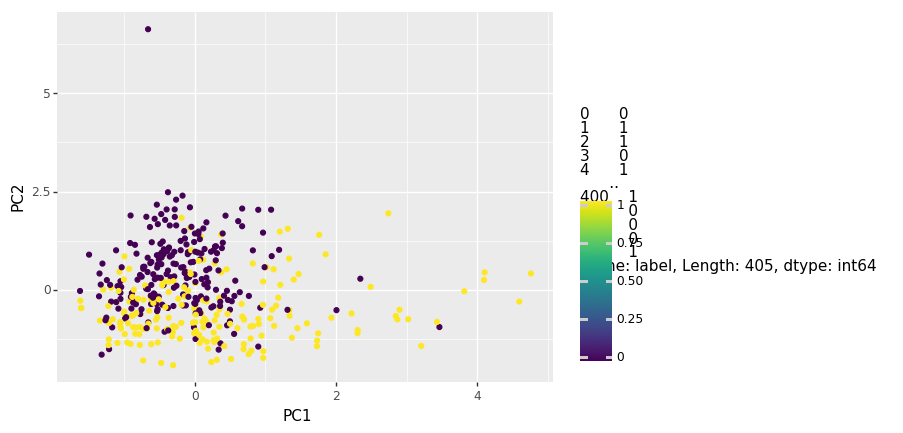

<ggplot: (8743518461713)>

In [141]:
from plotnine import *
ggplot(train_std,aes(x = 'PC1',y = 'PC2',color = train['label'])) + geom_point()

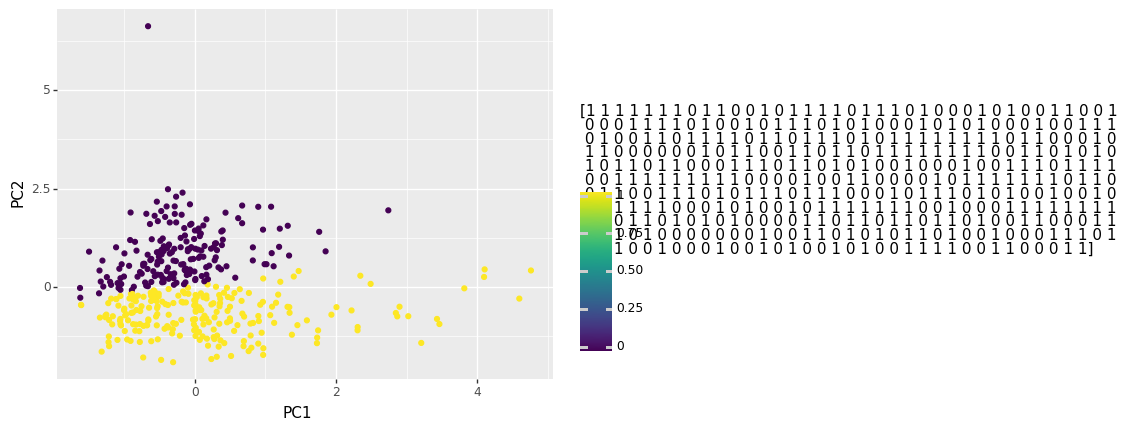

<ggplot: (8743518405969)>

In [142]:
ggplot(train_std,aes(x = 'PC1',y = 'PC2',color = kmeans.labels_)) + geom_point()

In [143]:
data = pd.concat([X_train,X_test]) # 전체 데이터에 대해 pca 진행해야 함
data_std = data[['PC1','PC2']]
data_std = StandardScaler().fit_transform(data_std)
kmeans = KMeans(n_clusters = 2,random_state = 42).fit(data_std)
data['clus'] = kmeans.labels_
X_train = data.iloc[:405,:]
X_test = data.iloc[405:,:]
X_test = X_test.reset_index(drop = True)

In [144]:
sum(X_train.clus == train.label) / len(train.label)

0.7209876543209877

> 데이터가 overlapped 되어 있기 때문에 클러스터링 결과와 다른 부분들도 존재하지만, 예측에 도움이 될 것이라 판단하여 데이터셋에 추가하였습니다.

### 3. Feature Engineering - Variable Transformation

In [145]:
train2 = train.copy()

In [146]:
train2['label'] = train2['label'].astype('object')
train2['slope2'] = train2['slopeUV0-500_sma3nz_amean_min'] ** 2

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


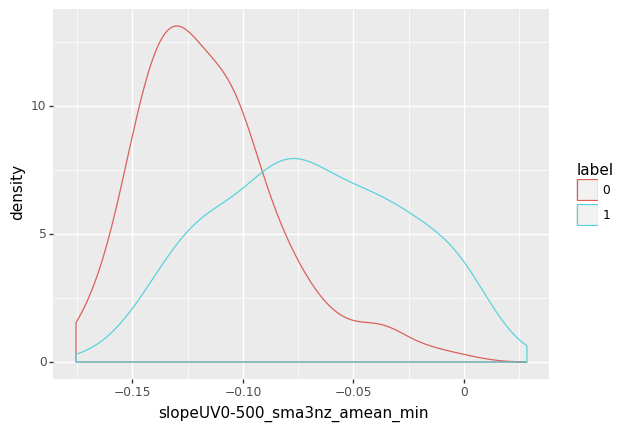

<ggplot: (8743518042321)>

In [147]:
from plotnine import *
ggplot(train2,aes(x = 'slopeUV0-500_sma3nz_amean_min',color = 'label')) + geom_density()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


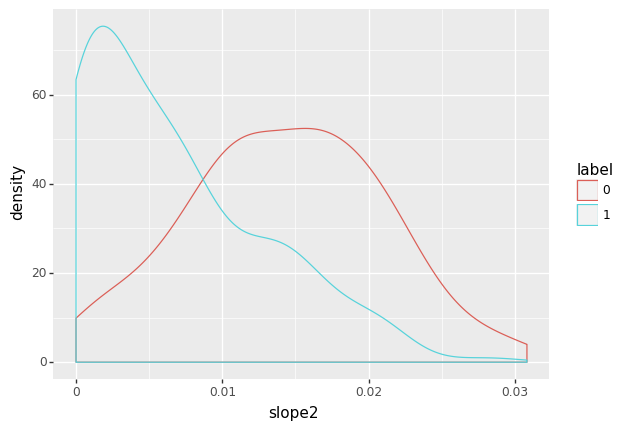

<ggplot: (8743518468041)>

In [148]:
ggplot(train2,aes(x = 'slope2',color = 'label')) + geom_density()

In [149]:
X_train['slope2'] = X_train['slopeUV0-500_sma3nz_amean_min'] ** 2
X_test['slope2'] = X_test['slopeUV0-500_sma3nz_amean_min'] ** 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


> 시각화 결과, 'slopeUV0-500_sma3nz_amean_min'의 제곱은 라벨 분류에 효과적이라고 판단되어, 해당 변수를 추가하였다.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


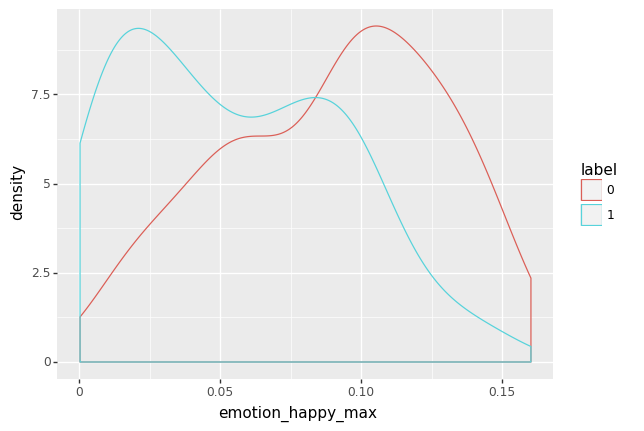

<ggplot: (8743518538769)>

In [150]:
ggplot(train2,aes(x = 'emotion_happy_max',color = 'label')) + geom_density()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


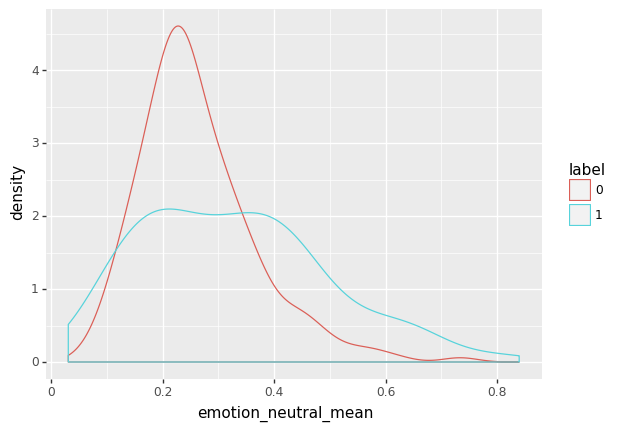

<ggplot: (8743518590317)>

In [151]:
ggplot(train2,aes(x = 'emotion_neutral_mean',color = 'label')) + geom_density()

In [152]:
train2['happiness'] = np.log((train2['emotion_happy_max'] + 10**(-9) ) / train2['emotion_neutral_mean'])

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


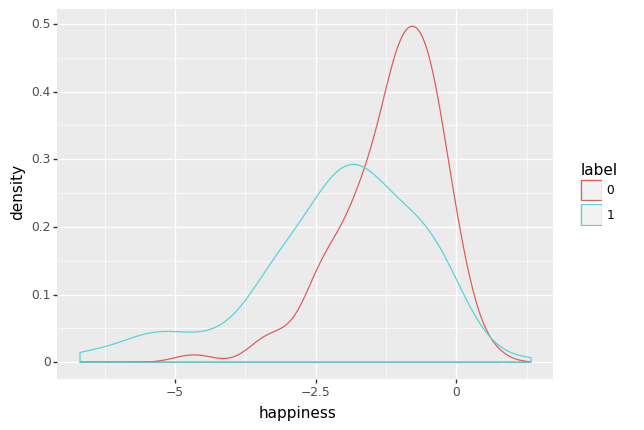

<ggplot: (8743518378745)>

In [153]:
ggplot(train2,aes(x = 'happiness',color = 'label')) + geom_density()

> 시각화 결과, label 1은 label 0 에 비해 최대 happy 값이 작으며, 평균적인 neutral 값이 크다는 것을 확인하였다. 이를 이용하여 다음의 피처를 추가해주었다.

In [154]:
X_train['happiness'] = np.log((X_train['emotion_happy_max'] + 10**(-9) ) / X_train['emotion_neutral_mean'])
X_test['happiness'] = np.log((X_test['emotion_happy_max'] + 10**(-9) ) / X_test['emotion_neutral_mean'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [155]:
X_train.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_pctlrange0-2_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,shimmerLocaldB_sma3nz_stddevNorm_mean,HNRdBACF_sma3nz_amean_mean,HNRdBACF_sma3nz_stddevNorm_mean,logRelF0-H1-H2_sma3nz_amean_mean,logRelF0-H1-H2_sma3nz_stddevNorm_mean,logRelF0-H1-A3_sma3nz_amean_mean,logRelF0-H1-A3_sma3nz_stddevNorm_mean,F1frequency_sma3nz_amean_mean,F1frequency_sma3nz_stddevNorm_mean,F1bandwidth_sma3nz_amean_mean,F1bandwidth_sma3nz_stddevNorm_mean,F1amplitudeLogRelF0_sma3nz_stddevNorm_mean,F2frequency_sma3nz_amean_mean,F2frequency_sma3nz_stddevNorm_mean,F2bandwidth_sma3nz_amean_mean,F2bandwidth_sma3nz_stddevNorm_mean,F2amplitudeLogRelF0_sma3nz_stddevNorm_mean,F3frequency_sma3nz_amean_mean,...,HNRdBACF_sma3nz_stddevNorm_max,logRelF0-H1-H2_sma3nz_amean_max,logRelF0-H1-H2_sma3nz_stddevNorm_max,logRelF0-H1-A3_sma3nz_amean_max,logRelF0-H1-A3_sma3nz_stddevNorm_max,F1bandwidth_sma3nz_stddevNorm_max,F1amplitudeLogRelF0_sma3nz_stddevNorm_max,F2frequency_sma3nz_stddevNorm_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,PC1,PC2,clus,slope2,happiness
0,0.159302,0.001206,0.095556,0.103968,0.241841,0.015937,0.380635,0.175620,21.451660,118.805772,71.780979,0.456544,0.874988,0.695773,0.693588,-0.327011,2.948707,0.621157,-0.636670,0.041140,1.294767,1.411157,0.626918,0.877843,4.139195,-0.287642,-0.290519,15.581802,-0.273956,544.655074,0.392437,1253.904941,0.169909,-2.394409,1537.854905,0.152067,965.712732,0.254926,-1.559542,2522.978859,...,2899.301813,22.554159,884.256909,41.183660,212.056552,0.004373,310.228394,0.001517,0.013287,13.057997,0.010718,1454.616107,17.167801,0.121265,0.000749,2.103438e+01,0.000062,2.359656,0.056775,38.786267,0.067508,39.441458,76.087625,93.992936,77.820486,36532.756730,19.835802,0.001236,0.000041,3.247842,1.524696,0.038395,0.007741,0.009176,17.493596,-0.014919,-5.380425,1,0.003115,-2.623733
1,0.078909,0.000098,0.097341,0.111471,0.152525,0.038076,0.521042,0.180559,17.321590,87.802155,67.882583,0.416345,0.439405,0.502883,0.305130,2.699263,1.668620,1.532773,3.519948,0.065575,1.384110,1.419527,0.543701,-1.146932,0.672221,0.158461,18.794347,16.829154,0.816122,538.892465,0.373174,1256.766817,0.142594,-2.579767,1509.073255,0.163857,955.045890,0.209656,-1.470210,2522.071757,...,498.347861,35.250829,267415.174368,34.848164,69.305493,0.000972,300.911736,0.001840,0.005533,0.276725,0.008120,445.160892,8.891616,0.006371,0.000527,1.106866e+07,0.000032,212.740090,0.033280,24.012308,0.017846,21.320284,41.933796,520.846650,41.720618,388.881196,15.238695,0.000494,0.000053,3.604506,2.172738,0.061666,0.010000,0.002145,12.858519,-6.027202,-10.295450,1,0.013102,-3.430895
2,0.034322,0.000095,0.022808,0.137

In [156]:
X_test.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_pctlrange0-2_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,shimmerLocaldB_sma3nz_stddevNorm_mean,HNRdBACF_sma3nz_amean_mean,HNRdBACF_sma3nz_stddevNorm_mean,logRelF0-H1-H2_sma3nz_amean_mean,logRelF0-H1-H2_sma3nz_stddevNorm_mean,logRelF0-H1-A3_sma3nz_amean_mean,logRelF0-H1-A3_sma3nz_stddevNorm_mean,F1frequency_sma3nz_amean_mean,F1frequency_sma3nz_stddevNorm_mean,F1bandwidth_sma3nz_amean_mean,F1bandwidth_sma3nz_stddevNorm_mean,F1amplitudeLogRelF0_sma3nz_stddevNorm_mean,F2frequency_sma3nz_amean_mean,F2frequency_sma3nz_stddevNorm_mean,F2bandwidth_sma3nz_amean_mean,F2bandwidth_sma3nz_stddevNorm_mean,F2amplitudeLogRelF0_sma3nz_stddevNorm_mean,F3frequency_sma3nz_amean_mean,...,HNRdBACF_sma3nz_stddevNorm_max,logRelF0-H1-H2_sma3nz_amean_max,logRelF0-H1-H2_sma3nz_stddevNorm_max,logRelF0-H1-A3_sma3nz_amean_max,logRelF0-H1-A3_sma3nz_stddevNorm_max,F1bandwidth_sma3nz_stddevNorm_max,F1amplitudeLogRelF0_sma3nz_stddevNorm_max,F2frequency_sma3nz_stddevNorm_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,PC1,PC2,clus,slope2,happiness
0,0.155693,0.000225,0.077640,0.226517,0.208652,0.044869,0.285805,0.204727,18.768689,120.644116,98.211368,0.517132,0.864454,0.816384,0.527930,1.689141,-3.422121,0.737629,3.275405,0.076818,1.205838,1.659669,0.564678,-0.045818,-1.300836,2.728719,-0.394607,13.197454,2.309000,466.018209,0.311096,1208.817200,0.170271,-1.495334,1481.746006,0.129748,885.219095,0.327115,-1.105450,2469.040134,...,314.939318,35.531743,673.608950,23.844690,647.327806,0.002534,0.312737,0.001761,0.012680,0.061312,0.012500,591.961803,14.797768,0.013479,0.000349,4330.337793,0.000049,0.019668,0.069729,21.824390,0.018730,30.531802,66.268935,268.242701,50.879484,667.047326,22.063426,0.000287,0.000038,2.445959,2.175879,0.027020,0.005952,0.003459,15.198562,-5.607462,-7.435839,1,0.005729,-1.333544
1,0.177189,0.000472,0.095150,0.250708,0.331609,0.024785,0.118970,0.124259,29.709912,83.734519,74.981479,0.456558,1.495853,0.712600,0.830010,-17.246966,-0.134327,1.108757,-15.705268,0.036286,1.259429,1.129771,0.611353,3.541452,1.525943,3.298607,7.724861,12.541421,0.904145,630.279075,0.397053,1145.179231,0.194081,-1.563537,1642.592616,0.154431,890.112660,0.310175,-1.351307,2603.947617,...,116.194420,27.737827,19514.142836,45.050133,6.150408,0.006607,9.016917,0.002131,0.019419,34.576160,0.015091,1995.585941,27.573449,4.331645,0.001032,4.839315,0.000077,7.919872,0.040509,71.631249,0.293790,94.483504,88.068110,106.725353,114.730813,317.448196,27.561844,0.000710,0.000046,2.845289,1.989588,0.034542,0.007503,0.028266,45.247296,7.410730,3.790181,0,0.009220,-0.094888
2,0.115742,0.000000,0.137801,0.263019,0.037417,0

- Yeo-johnson Transformation

In [157]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [158]:
data = pd.concat([X_train,X_test])
pt = PowerTransformer()
data_s = pt.fit_transform(data)
data_s = pd.DataFrame(data_s)

In [159]:
data_s.columns = data.columns
Xs_train = data_s.iloc[:405,:]
Xs_test = data_s.iloc[405:,:]
Xs_test = Xs_test.reset_index(drop = True)

In [160]:
train2.describe()

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_pctlrange0-2_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,shimmerLocaldB_sma3nz_stddevNorm_mean,HNRdBACF_sma3nz_amean_mean,HNRdBACF_sma3nz_stddevNorm_mean,logRelF0-H1-H2_sma3nz_amean_mean,logRelF0-H1-H2_sma3nz_stddevNorm_mean,logRelF0-H1-A3_sma3nz_amean_mean,logRelF0-H1-A3_sma3nz_stddevNorm_mean,F1frequency_sma3nz_amean_mean,F1frequency_sma3nz_stddevNorm_mean,F1bandwidth_sma3nz_amean_mean,F1bandwidth_sma3nz_stddevNorm_mean,F1amplitudeLogRelF0_sma3nz_stddevNorm_mean,F2frequency_sma3nz_amean_mean,F2frequency_sma3nz_stddevNorm_mean,F2bandwidth_sma3nz_amean_mean,F2bandwidth_sma3nz_stddevNorm_mean,F2amplitudeLogRelF0_sma3nz_stddevNorm_mean,F3frequency_sma3nz_amean_mean,...,HNRdBACF_sma3nz_amean_max,HNRdBACF_sma3nz_stddevNorm_max,logRelF0-H1-H2_sma3nz_amean_max,logRelF0-H1-H2_sma3nz_stddevNorm_max,logRelF0-H1-A3_sma3nz_amean_max,logRelF0-H1-A3_sma3nz_stddevNorm_max,F1bandwidth_sma3nz_stddevNorm_max,F1amplitudeLogRelF0_sma3nz_stddevNorm_max,F2frequency_sma3nz_stddevNorm_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,PC1,PC2,slope2,happiness
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,0.128547,0.001497,0.103264,0.254882,0.168895,0.049551,0.292277,0.198189,25.019881,132.711805,90.526609,0.515119,1.075586,0.695642,0.179616,-1.317826,-1.443551,6.442474,-4.798155,0.056249,1.386572,1.333257,0.607500,2.699270,0.822490,4.339187,1.164703,16.052198,0.996093,576.778291,0.353279,1228.934690,0.183030,-1.768927,1587.112441,0.149352,955.193157,0.332588,-1.229521,2591.719025,...,9.877021,2.650099e+04,52.985414,2.269868e+06,54.671036,1.920576e+04,0.004130,2466.998489,0.001562,0.016716,56.391881,0.017861,1097.405498,30.638778,117.956872,0.001032,1.116691e+05,0.000064,3.497660e+05,0.048210,44.106745,34.954580,78.426519,81.701834,1.250298e+07,80.4

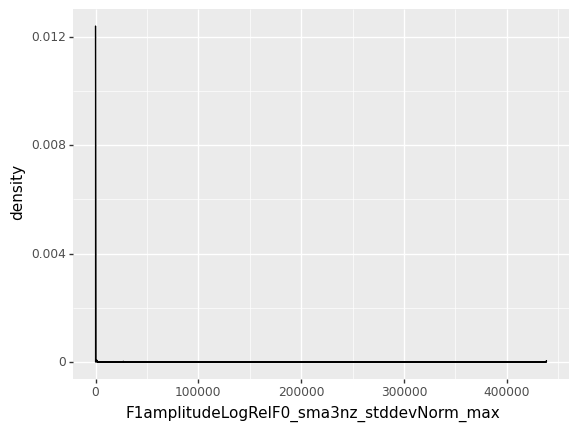

<ggplot: (8743518075525)>

In [161]:
ggplot(train2,aes(x = 'F1amplitudeLogRelF0_sma3nz_stddevNorm_max')) + geom_density()

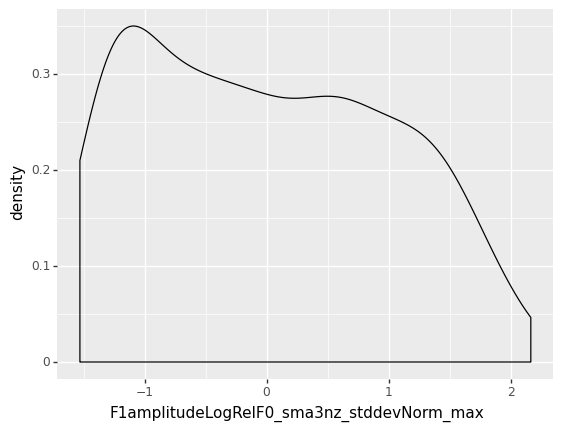

<ggplot: (8743518559125)>

In [162]:
ggplot(data_s,aes(x = 'F1amplitudeLogRelF0_sma3nz_stddevNorm_max')) + geom_density()

# 4. Modeling

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import KFold,StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Importing core libraries
import pprint
import joblib

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-qopnczje
  Running command git clone -q https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-qopnczje
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached https://files.pythonhosted.org/packages/15/c4/1310a054d33abc318426a956e7d6df0df76a6ddfa9c66f6310274fb75d42/pyaml-20.4.0-py2.py3-none-any.whl
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.dev0-cp37-none-any.whl size=100282 sha256=f9ce2f12325d370c63669762dc0517b17c494225ae9758bba65c795139631696
  Stored in directory: /tmp/pip-ephem-wheel-cache-dj_iwcx4/wheels/11/6f/86/2b772172db85ad0b4487d67e325e535ee8e7782b2a1dfcadf5
Successfully built scikit-optimize


In [ ]:
# Skopt functions
from skopt import BayesSearchCV
from skopt import gp_minimize # Bayesian optimization using Gaussian Processes
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args # decorator to convert a list of parameters to named arguments
from sklearn.metrics import make_scorer

In [ ]:
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, 
                                            shuffle = True,stratify = Y_train,random_state = 123)

In [163]:
Xs_tr, Xs_val, Y_tr, Y_val = train_test_split(Xs_train, Y_train, test_size = 0.3, 
                                            shuffle = True,stratify = Y_train,random_state = 123)

### 1. Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier as RFC

#### 1. Parameter Tuning - Grid Search

In [ ]:
param_grid = {
    'n_estimators':[200,400,600,800,1000],
    'max_depth':[2,3,4,5,6],
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log2'],
    'min_samples_split':[4,8,12,16,20],
    'min_samples_leaf':[2,4,6,8,10]
}

In [ ]:
rf_grid = GridSearchCV(estimator = RFC(random_state = 123), param_grid = param_grid,
                       cv = KFold(n_splits = 5, random_state = 42), 
                       n_jobs = -1, verbose = 2)
rf_grid.fit(Xs_train, Y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 59.5min
[Parallel(n_jobs=-1)

In [ ]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 800}

In [ ]:
rf_grid.best_score_

0.8271604938271604

In [ ]:
best_rf = rf_grid.best_estimator_

In [73]:
best_rf = RFC(random_state = 123,
              criterion = 'gini',
              max_depth = 5,
              max_features = 'sqrt',
              min_samples_leaf = 2,
              min_samples_split = 4,
              n_estimators = 800)

#### 2. Feature Selection

- RFE

In [71]:
from sklearn.feature_selection import RFE

In [ ]:
rfe20 = RFE(estimator = best_rf,
            n_features_to_select = 20,verbose = -1)
rfe20.fit(Xs_train,Y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=5, max_features='sqrt',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=2, min_samples_split=4,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=800, n_jobs=None,
                                     oob_score=False, random_state=123,
                                     verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=-1)

In [ ]:
mask = rfe20.support_
Xs_tr_20 = Xs_tr.loc[:, mask]
Xs_val_20 = Xs_val.loc[:,mask]
Xs_train_20 = Xs_train.loc[:,mask]
Xs_test_20 = Xs_test.loc[:,mask]
print(Xs_train_20.columns)

Index(['emotion_happy_mean', 'loudness_sma3_stddevNorm_mean',
       'mfcc1_sma3_stddevNorm_mean', 'spectralFluxV_sma3nz_amean_mean',
       'loudnessPeaksPerSec_mean', 'loudness_sma3_pctlrange0-2_min',
       'slopeV0-500_sma3nz_amean_min', 'slopeUV0-500_sma3nz_amean_min',
       'emotion_happy_max', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_max',
       'loudness_sma3_stddevNorm_max', 'loudness_sma3_percentile20.0_max',
       'loudness_sma3_meanRisingSlope_max',
       'loudness_sma3_stddevRisingSlope_max', 'slopeV0-500_sma3nz_amean_max',
       'slopeUV0-500_sma3nz_amean_max', 'MeanUnvoicedSegmentLength_max', 'PC2',
       'slope2', 'happiness'],
      dtype='object')


In [ ]:
rfe40 = RFE(estimator = best_rf,
            n_features_to_select = 40,verbose = -1)
rfe40.fit(Xs_train,Y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=5, max_features='sqrt',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=2, min_samples_split=4,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=800, n_jobs=None,
                                     oob_score=False, random_state=123,
                                     verbose=0, warm_start=False),
    n_features_to_select=40, step=1, verbose=-1)

In [ ]:
mask = rfe40.support_
Xs_tr_40 = Xs_tr.loc[:, mask]
Xs_val_40 = Xs_val.loc[:,mask]
Xs_train_40 = Xs_train.loc[:,mask]
Xs_test_40 = Xs_test.loc[:,mask]
print(Xs_train_40.columns)

Index(['emotion_happy_mean', 'emotion_neutral_mean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean',
       'loudness_sma3_stddevNorm_mean', 'spectralFlux_sma3_stddevNorm_mean',
       'mfcc1_sma3_stddevNorm_mean', 'mfcc4_sma3_amean_mean',
       'logRelF0-H1-H2_sma3nz_amean_mean', 'spectralFluxV_sma3nz_amean_mean',
       'slopeUV0-500_sma3nz_amean_mean', 'slopeUV500-1500_sma3nz_amean_mean',
       'loudnessPeaksPerSec_mean', 'StddevVoicedSegmentLengthSec_mean',
       'loudness_sma3_pctlrange0-2_min', 'mfcc2_sma3_amean_min',
       'slopeV0-500_sma3nz_amean_min', 'slopeV0-500_sma3nz_stddevNorm_min',
       'slopeUV0-500_sma3nz_amean_min', 'equivalentSoundLevel_dBp_min',
       'emotion_happy_max', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_max',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_max',
       'loudness_sma3_stddevNorm_max', 'loudness_sma3_percentile20.0_max',
       'loudness_sma3_meanRisingSlope_max',
       'loudness_sma3_stddevRisingSlope_max', 'HNRdBA

In [164]:
rfe60 = RFE(estimator = best_rf,
            n_features_to_select = 60,verbose = -1)
rfe60.fit(Xs_train,Y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=5, max_features='sqrt',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=2, min_samples_split=4,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=800, n_jobs=None,
                                     oob_score=False, random_state=123,
                                     verbose=0, warm_start=False),
    n_features_to_select=60, step=1, verbose=-1)

In [165]:
mask = rfe60.support_
Xs_tr_60 = Xs_tr.loc[:, mask]
Xs_val_60 = Xs_val.loc[:,mask]
Xs_train_60 = Xs_train.loc[:,mask]
Xs_test_60 = Xs_test.loc[:,mask]
print(Xs_train_60.columns)

Index(['emotion_happy_mean', 'emotion_sad_mean', 'emotion_neutral_mean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean',
       'loudness_sma3_stddevNorm_mean', 'spectralFlux_sma3_stddevNorm_mean',
       'mfcc1_sma3_stddevNorm_mean', 'mfcc4_sma3_amean_mean',
       'logRelF0-H1-H2_sma3nz_amean_mean', 'F2bandwidth_sma3nz_amean_mean',
       'spectralFluxV_sma3nz_amean_mean',
       'spectralFluxV_sma3nz_stddevNorm_mean',
       'slopeUV0-500_sma3nz_amean_mean', 'slopeUV500-1500_sma3nz_amean_mean',
       'loudnessPeaksPerSec_mean', 'VoicedSegmentsPerSec_mean',
       'StddevVoicedSegmentLengthSec_mean', 'loudness_sma3_percentile80.0_min',
       'loudness_sma3_pctlrange0-2_min', 'loudness_sma3_meanRisingSlope_min',
       'spectralFlux_sma3_amean_min', 'mfcc2_sma3_amean_min',
       'mfcc4_sma3_amean_min', 'slopeV0-500_sma3nz_amean_min',
       'slopeV0-500_sma3nz_stddevNorm_min', 'slopeUV0-500_sma3nz_amean_min',
       'equivalentSoundLevel_dBp_min', 'emotion_angry_max', 

In [ ]:
rfe80 = RFE(estimator = best_rf,
            n_features_to_select = 80,verbose = -1)
rfe80.fit(Xs_train,Y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=5, max_features='sqrt',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=2, min_samples_split=4,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=800, n_jobs=None,
                                     oob_score=False, random_state=123,
                                     verbose=0, warm_start=False),
    n_features_to_select=80, step=1, verbose=-1)

In [ ]:
mask = rfe80.support_
Xs_tr_80 = Xs_tr.loc[:, mask]
Xs_val_80 = Xs_val.loc[:,mask]
Xs_train_80 = Xs_train.loc[:,mask]
Xs_test_80 = Xs_test.loc[:,mask]
print(Xs_train_80.columns)

Index(['emotion_angry_mean', 'emotion_disgust_mean', 'emotion_happy_mean',
       'emotion_sad_mean', 'emotion_neutral_mean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean',
       'loudness_sma3_stddevNorm_mean', 'spectralFlux_sma3_stddevNorm_mean',
       'mfcc1_sma3_stddevNorm_mean', 'mfcc2_sma3_amean_mean',
       'mfcc4_sma3_amean_mean', 'HNRdBACF_sma3nz_amean_mean',
       'logRelF0-H1-H2_sma3nz_amean_mean',
       'logRelF0-H1-A3_sma3nz_stddevNorm_mean',
       'F2frequency_sma3nz_stddevNorm_mean', 'F2bandwidth_sma3nz_amean_mean',
       'spectralFluxV_sma3nz_amean_mean',
       'spectralFluxV_sma3nz_stddevNorm_mean', 'mfcc1V_sma3nz_stddevNorm_mean',
       'alphaRatioUV_sma3nz_amean_mean', 'slopeUV0-500_sma3nz_amean_mean',
       'slopeUV500-1500_sma3nz_amean_mean', 'loudnessPeaksPerSec_mean',
       'VoicedSegmentsPerSec_mean', 'StddevVoicedSegmentLeng

In [ ]:
rfe100 = RFE(estimator = best_rf,
            n_features_to_select = 100,verbose = -1)
rfe100.fit(Xs_train,Y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=5, max_features='sqrt',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=2, min_samples_split=4,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=800, n_jobs=None,
                                     oob_score=False, random_state=123,
                                     verbose=0, warm_start=False),
    n_features_to_select=100, step=1, verbose=-1)

In [ ]:
mask = rfe100.support_
Xs_tr_100 = Xs_tr.loc[:, mask]
Xs_val_100 = Xs_val.loc[:,mask]
Xs_train_100 = Xs_train.loc[:,mask]
Xs_test_100 = Xs_test.loc[:,mask]
print(Xs_train_100.columns)

Index(['emotion_angry_mean', 'emotion_disgust_mean', 'emotion_happy_mean',
       'emotion_sad_mean', 'emotion_surprise_mean', 'emotion_neutral_mean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean',
       'loudness_sma3_stddevNorm_mean', 'loudness_sma3_pctlrange0-2_mean',
       'spectralFlux_sma3_stddevNorm_mean', 'mfcc1_sma3_stddevNorm_mean',
       'mfcc2_sma3_amean_mean', 'mfcc4_sma3_amean_mean',
       'HNRdBACF_sma3nz_amean_mean', 'logRelF0-H1-H2_sma3nz_amean_mean',
       'logRelF0-H1-A3_sma3nz_stddevNorm_mean',
       'F2frequency_sma3nz_stddevNorm_mean', 'F2bandwidth_sma3nz_amean_mean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm_mean',
       'slopeV0-500_sma3nz_stddevNorm_mean', 'spectralFluxV_sma3nz_amean_mean',
       'spectralFluxV_sma3nz_stddevNorm_mean', 'mfcc1V_sma3nz_stddevNorm_mean',
       'alphaRatioUV_sma3nz_amean_mean', 'slopeUV0-500_s

In [ ]:
best_rf.fit(Xs_tr_20,Y_tr)
Y_pred = best_rf.predict(Xs_val_20)
print(classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        66
           1       0.78      0.91      0.84        56

    accuracy                           0.84       122
   macro avg       0.85      0.85      0.84       122
weighted avg       0.85      0.84      0.84       122



In [ ]:
best_rf.fit(Xs_tr_40,Y_tr)
Y_pred = best_rf.predict(Xs_val_40)
print(classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        66
           1       0.79      0.93      0.85        56

    accuracy                           0.85       122
   macro avg       0.86      0.86      0.85       122
weighted avg       0.86      0.85      0.85       122



In [166]:
best_rf.fit(Xs_tr_60,Y_tr)
Y_pred = best_rf.predict(Xs_val_60)
print(classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        66
           1       0.80      0.93      0.86        56

    accuracy                           0.86       122
   macro avg       0.86      0.87      0.86       122
weighted avg       0.87      0.86      0.86       122



In [ ]:
best_rf.fit(Xs_tr_80,Y_tr)
Y_pred = best_rf.predict(Xs_val_80)
print(classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        66
           1       0.80      0.91      0.85        56

    accuracy                           0.85       122
   macro avg       0.86      0.86      0.85       122
weighted avg       0.86      0.85      0.85       122



In [ ]:
best_rf.fit(Xs_tr_100,Y_tr)
Y_pred = best_rf.predict(Xs_val_100)
print(classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        66
           1       0.78      0.91      0.84        56

    accuracy                           0.84       122
   macro avg       0.85      0.85      0.84       122
weighted avg       0.85      0.84      0.84       122



In [ ]:
best_rf.fit(Xs_train_60,Y_train)
Y_pred = best_rf.predict(Xs_test_60)
pd.DataFrame(Y_pred).to_csv('2017311974.csv',header = None)

#### 3. Submission

In [170]:
best_rf = RFC(random_state = 123, criterion = 'gini', max_depth = 5, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 800)

best_rf.fit(Xs_tr_60,Y_tr)
Y_pred = best_rf.predict(Xs_val_60)
print('validation acc: %.6f' %(accuracy_score(Y_pred,Y_val)))

Y_pred = best_rf.predict(Xs_tr_60)
print('training acc: %.6f' %(accuracy_score(Y_pred,Y_tr)))

validation acc: 0.860656
training acc: 0.961131


In [193]:
# 85.1485
best_rf = RFC(random_state = 123, criterion = 'gini', max_depth = 5, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 800)

best_rf.fit(Xs_train_60,Y_train)
Y_pred = best_rf.predict(Xs_test_60)

In [ ]:
pd.DataFrame(Y_pred).to_csv('2017311974.csv',header = None)

In [ ]:
best_rf.fit(Xs_train_60,Y_train)
y_pred = best_rf.predict(Xs_train_60)
print(accuracy_score(Y_train,y_pred))

0.9481481481481482


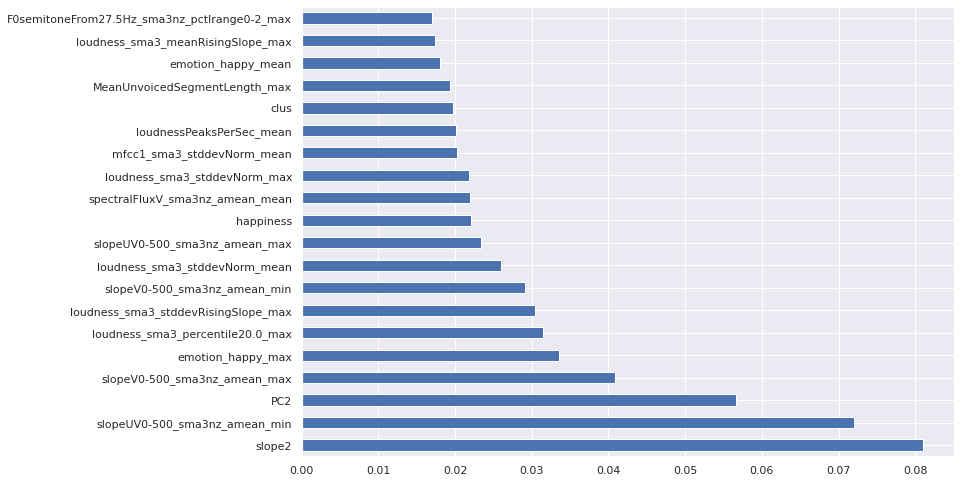

In [197]:
feat_importances = pd.Series(best_rf.feature_importances_, index = Xs_train_60.columns)
feat_importances.nlargest(20).plot(kind='barh')

### 2. Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression = LogisticRegression(random_state = 42,solver = 'liblinear',penalty = 'l1')
logistic_regression.fit(X_tr,Y_tr)
Y_pred = logistic_regression.predict(X_val)
print(accuracy_score(Y_val,Y_pred))

0.7377049180327869


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
logistic_regression = LogisticRegression(random_state = 42,solver = 'liblinear',penalty = 'l1')
logistic_regression.fit(Xs_tr,Y_tr)
Y_pred = logistic_regression.predict(Xs_val)
print(accuracy_score(Y_val,Y_pred))

0.7540983606557377


여존슨 변환을 한 데이터셋의 성능이 더 좋았다.

#### 1. L1 penalty

In [ ]:
param_grid = {
    'C': [0.00001,0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1]
}

lr_grid = GridSearchCV(estimator = LogisticRegression(random_state = 123,solver = 'liblinear',penalty = 'l1'), param_grid = param_grid,
                       cv = KFold(n_splits = 5, random_state = 42), 
                       n_jobs = -1, verbose = 2)
lr_grid.fit(Xs_train_60, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=123, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1,
                               0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
lr_grid.best_params_

{'C': 0.1}

In [ ]:
lr_grid.best_score_

0.8

#### 2. Feature selection

In [ ]:
param_grid = {
    'C': [0.00001,0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1],
    'solver': ['newton-cg','lbfgs','liblinear']
}

lr_grid = GridSearchCV(estimator = LogisticRegression(random_state = 123), param_grid = param_grid,
                       cv = KFold(n_splits = 5, random_state = 42), 
                       n_jobs = -1, verbose = 2)
lr_grid.fit(Xs_train_60, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=123, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1,
                               0.5, 1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [ ]:
lr_grid.best_params_

{'C': 0.05, 'solver': 'liblinear'}

In [ ]:
lr_grid.best_score_

0.8024691358024691

#### 3. Prediction

In [173]:
best_lr = LogisticRegression(random_state = 42,C = 0.05,solver = 'liblinear')

best_lr.fit(Xs_tr_60,Y_tr)
Y_pred = best_lr.predict(Xs_val_60)
print('validation acc: %.6f' %(accuracy_score(Y_pred,Y_val)))

Y_pred = best_lr.predict(Xs_tr_60)
print('training acc: %.6f' %(accuracy_score(Y_pred,Y_tr)))

validation acc: 0.844262
training acc: 0.823322


In [174]:
best_lr.fit(Xs_train_60,Y_train)
Y_pred = best_lr.predict(Xs_test_60)

In [ ]:
pd.DataFrame(Y_pred).to_csv('2017311974.csv',header = None)

### 3. SVC

In [68]:
from sklearn.svm import SVC 

#### 1. Parameter Tuning - Grid Search

In [ ]:
param_grid = {
    'C': [0.1,1,10,100,1000],
    'gamma': [0.001,0.01,0.05,0.1,0.5,1],
    'kernel': ['rbf','poly','sigmoid']
}

In [ ]:
grid = GridSearchCV(SVC(random_state = 123),param_grid,refit = True,cv = KFold(n_splits = 5, random_state = 42),verbose = 1)
grid.fit(Xs_train_60,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    7.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
grid.best_score_

0.8271604938271604

#### 2. Submission

In [192]:
best_svc = SVC(C = 100,kernel = 'rbf',gamma = 0.001,random_state = 123)

best_svc.fit(Xs_tr_60,Y_tr)
Y_pred = best_svc.predict(Xs_val_60)
print('validation acc: %.6f' %(accuracy_score(Y_pred,Y_val)))

Y_pred = best_svc.predict(Xs_tr_60)
print('training acc: %.6f' %(accuracy_score(Y_pred,Y_tr)))

validation acc: 0.860656
training acc: 0.915194


In [ ]:
# 85.1485
best_svc = SVC(C = 100,kernel = 'rbf',gamma = 0.001,random_state = 123)

best_svc.fit(Xs_train_60,Y_train)
Y_pred = best_svc.predict(Xs_test_60)

In [ ]:
pd.DataFrame(Y_pred).to_csv('2017311974.csv',header = None)

In [ ]:
y_pred = best_svc.predict(Xs_train_60)
print(accuracy_score(Y_train,y_pred))

0.9160493827160494


### 4. LGBM

In [176]:
from lightgbm import LGBMClassifier as lgb

#### 1. Parameter Tuning - Bayesian Optimization

In [ ]:
params =   {
       'num_leaves': (10, 1000),        # num_leaves,       범위(16~1024)
       'learning_rate': (0.001, 0.1),  # learning_rate,    범위(0.0001~0.1)
       'n_estimators': (50, 1000),      # n_estimators,     범위(16~1024)
       'max_bin': (100,1000),
       'subsample': (0, 1),             # subsample,        범위(0~1)
       'colsample_bytree': (0.7,0.9),      # colsample_bytree, 범위(0~1)
       'reg_alpha': (0, 0.1),            # reg_alpha,        범위(0~10)
       'reg_lambda': (0, 0.1),          # reg_lambda,       범위(0~50)
       'bagging_fraction':(0.8,1),
       'feature_fraction':(0.1,0.9),
       'max_depth': (-1, 10),
       'min_split_gain': (0.001,0.1),
       'min_child_weight': (5,50)
        } 

In [ ]:
lgb_bayes_cv = BayesSearchCV(
    estimator = lgb(random_state = 123, objective = 'binary',num_iterations = 1000),
    search_spaces = params,
    scoring = 'accuracy',
    cv = KFold(n_splits = 5, random_state = 42),
    n_iter = 30, # iteration 더 올릴 수 있음
    return_train_score = False,
    refit = True,
    optimizer_kwargs = {'base_estimator':'GP'},
    random_state = 123
)

In [ ]:
result_lgbm = lgb_bayes_cv.fit(Xs_train_60,Y_train)

In [ ]:
result_lgbm.best_params_

OrderedDict([('bagging_fraction', 0.8),
             ('colsample_bytree', 0.9),
             ('feature_fraction', 0.1),
             ('learning_rate', 0.1),
             ('max_bin', 100),
             ('max_depth', 10),
             ('min_child_weight', 5),
             ('min_split_gain', 0.001),
             ('n_estimators', 1000),
             ('num_leaves', 10),
             ('reg_alpha', 0.1),
             ('reg_lambda', 0.1),
             ('subsample', 1)])

In [ ]:
result_lgbm.best_score_

0.8148148148148149

#### 2. Parameter Tuning - Grid Search

In [ ]:
bayes_params = {
    'bagging_fraction': 0.8,
    'colsample_bytree': 0.9,
    'feature_fraction': 0.1,
    'learning_rate': 0.1,
    'max_bin': 100,
    'max_depth': 10,
    'min_child_weight': 5,
    'min_split_gain': 0.001,
    'n_estimators': 1000,
    'num_leaves': 10,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'subsample': 1
}

In [ ]:
params1 = {
    'learning_rate': [0.001,0.005,0.01,0.05,0.1],
    'n_estimators': [600,700,800,900,1000],
    'max_depth': [6,7,8,9,10,11],
    'num_leaves': [10,20,30]
}

In [ ]:
mdl = lgb(objective = 'binary', 
          silent = True,
          max_bin = bayes_params['max_bin'], 
          subsample = bayes_params['subsample'], 
          min_child_weight = bayes_params['min_child_weight'],
          min_split_gain = bayes_params['min_split_gain'], 
          bagging_fraction = bayes_params['bagging_fraction'],
          colsample_bytree = bayes_params['colsample_bytree'],
          feature_fraction = bayes_params['feature_fraction'],
          reg_alpha = bayes_params['reg_alpha'],
          reg_lambda = bayes_params['reg_lambda'],
          random_state = 123
          )

grid = GridSearchCV(mdl, params1, verbose=1, cv = KFold(n_splits = 5, random_state = 42), n_jobs=-1)

In [ ]:
grid.fit(Xs_train_60,Y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:  4.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.8,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.9,
                                      feature_fraction=0.1,
                                      importance_type='split',
                                      learning_rate=0.1, max_bin=100,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=5, min_split_gain=0.001,
                                      n_estimators=10...
                                      random_state=123, reg_alpha=0.1,
                                      reg_lambda=0.1, silent=True, subsample=1,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated

In [ ]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 600, 'num_leaves': 20}

In [ ]:
grid.best_score_

0.8246913580246913

In [ ]:
params2 =   {
       'max_bin': [100,200],
       'colsample_bytree': [0.8,0.9],      # colsample_bytree, 범위(0~1)
       'reg_alpha': [0.05,0.08,0.1],            # reg_alpha,        범위(0~10)
       'reg_lambda': [0.05,0.08,0.1],          # reg_lambda,       범위(0~50)
       'min_child_weight': [5,10],
       'feature_fraction': [0.1,0.2],
       'min_split_gain': [0.001,0.005,0.01],
       'subsample': [0.9,1],
       'bagging_fraction': [0.8,0.85]
        } 

In [ ]:
mdl = lgb(boosting_type= 'gbdt', 
          objective = 'binary', 
          silent = True,
          n_estimators = 600,
          learning_rate = 0.1,
          max_depth = 6,
          num_leaves = 20,
          random_state = 123
          )

grid = GridSearchCV(mdl, params2, verbose=1, cv = KFold(n_splits = 5, random_state = 42), n_jobs=-1)

In [ ]:
grid.fit(Xs_train_60,Y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:  9.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=6,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=600,
                                      n_jobs=-1, num_leaves=20,
                                      objective='binary', random_s...
             iid='deprecated', n_jobs=-1,
             param_grid={'bagging_fraction': [0.8, 0.85],
                         'colsample_bytree': [0.8, 0.9],
                         'feature_fraction': [0.1, 0.2], 'max_bin': [100, 200],
                         'min_child_weight': [5, 10],
        

In [ ]:
grid.best_params_

{'bagging_fraction': 0.8,
 'colsample_bytree': 0.8,
 'feature_fraction': 0.1,
 'max_bin': 100,
 'min_child_weight': 5,
 'min_split_gain': 0.001,
 'reg_alpha': 0.08,
 'reg_lambda': 0.1,
 'subsample': 0.9}

In [ ]:
grid.best_score_

0.837037037037037

#### 3. Submission

In [177]:
best_lgb = lgb(objective = 'binary', 
          silent = True,
          n_estimators = 600,
          learning_rate = 0.1,
          max_depth = 6,
          num_leaves = 20,
          colsample_bytree = 0.8,
          feature_fraction = 0.1,
          bagging_fraction = 0.8,
          max_bin = 100,
          min_child_weight = 5,
          min_split_gain = 0.001,
          reg_alpha = 0.08,
          reg_lambda = 0.1,
          subsample = 0.9,
          random_state = 123
          )

best_lgb.fit(Xs_tr_60,Y_tr)
Y_pred = best_lgb.predict(Xs_val_60)
print('validation acc: %.6f' %(accuracy_score(Y_pred,Y_val)))

Y_pred = best_lgb.predict(Xs_tr_60)
print('training acc: %.6f' %(accuracy_score(Y_pred,Y_tr)))

validation acc: 0.803279
training acc: 0.996466


In [ ]:
# 85.1485
best_lgb = lgb(objective = 'binary', 
          silent = True,
          n_estimators = 600,
          learning_rate = 0.1,
          max_depth = 6,
          num_leaves = 20,
          colsample_bytree = 0.8,
          feature_fraction = 0.1,
          bagging_fraction = 0.8,
          max_bin = 100,
          min_child_weight = 5,
          min_split_gain = 0.001,
          reg_alpha = 0.08,
          reg_lambda = 0.1,
          subsample = 0.9,
          random_state = 123
          )

best_lgb.fit(Xs_train_60,Y_train)
Y_pred = best_lgb.predict(Xs_test_60)

In [ ]:
pd.DataFrame(Y_pred).to_csv('2017311974.csv',header = None)

In [ ]:
best_lgb.fit(Xs_train_60,Y_train)
y_pred = best_lgb.predict(Xs_train_60)
print(accuracy_score(Y_train,y_pred))

1.0


### 5. Gradient Boosting Classifier

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

#### 1. Parameter Tuning - Bayesian Optimization

In [ ]:
params = {
    'learning_rate': [0.001,0.005,0.01,0.05,0.1],
    'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
    'max_features':['log2','sqrt'],
    'max_depth':[1,2,3],
    'min_samples_split':Integer(2,20),
    'min_samples_leaf':Integer(1,10),
    'subsample': [0.7,0.75,0.8,0.85,0.9,0.95,1]
}

In [ ]:
bayes_gb = BayesSearchCV(
    estimator = GradientBoostingClassifier(random_state = 123),
    search_spaces = params,
    scoring = 'accuracy',
    cv = KFold(n_splits = 5, random_state = 42),
    n_iter = 30,
    n_jobs = 1,
    return_train_score = False,
    refit = True,
    optimizer_kwargs = {'base_estimator':'GP'},
    random_state = 123
)

In [ ]:
result_gb = bayes_gb.fit(Xs_train_60,Y_train)

In [ ]:
result_gb.best_params_

OrderedDict([('learning_rate', 0.1),
             ('max_depth', 3),
             ('max_features', 'log2'),
             ('min_samples_leaf', 3),
             ('min_samples_split', 16),
             ('n_estimators', 1000),
             ('subsample', 1.0)])

In [ ]:
result_gb.best_score_

0.8148148148148147

#### 2. Paramter Tuning - Grid Search

In [ ]:
bayes_params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'max_features': 'log2',
    'min_samples_leaf': 3,
    'min_samples_split': 16,
    'n_estimators': 1000,
    'subsample': 1.0
}

In [ ]:
param_grid = {
    'n_estimators':[800,900,1000],
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': [2,3,4],
    'max_features': ['log2'],
    'min_samples_split': [14,16,18],
    'min_samples_leaf': [2,3,4],
    'subsample': [0.9,1]
}

In [ ]:
gb_grid = GridSearchCV(estimator = GradientBoostingClassifier(random_state = 123), param_grid = param_grid,
                       cv = KFold(n_splits = 5, random_state = 42), 
                       n_jobs = -1, verbose = 2)
gb_grid.fit(Xs_train_60, Y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 24.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_...
                                                  validation_fraction=0.1,
                             

In [ ]:
gb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'n_estimators': 1000,
 'subsample': 0.9}

In [ ]:
gb_grid.best_score_

0.8222222222222222

#### 3. Submission

In [179]:
bayes_params = {
    'learning_rate': 0.1, # updated
    'max_depth': 2, # updated
    'max_features': 'log2', # updated
    'min_samples_leaf': 2, # updated
    'min_samples_split': 14, # updated
    'n_estimators': 1000, # updated
    'subsample': 0.9 # updated
}

best_gb = GradientBoostingClassifier(
    random_state = 123,
    learning_rate = bayes_params['learning_rate'],
    n_estimators = bayes_params['n_estimators'],
    max_features = bayes_params['max_features'],
    max_depth = bayes_params['max_depth'],
    min_samples_leaf = bayes_params['min_samples_leaf'],
    min_samples_split = bayes_params['min_samples_split'],
    subsample = bayes_params['subsample']
)

best_gb.fit(Xs_tr_60,Y_tr)
Y_pred = best_gb.predict(Xs_val_60)
print('validation acc: %.6f' %(accuracy_score(Y_pred,Y_val)))

Y_pred = best_gb.predict(Xs_tr_60)
print('training acc: %.6f' %(accuracy_score(Y_pred,Y_tr)))

validation acc: 0.827869
training acc: 1.000000


In [ ]:
# 81.1881
bayes_params = {
    'learning_rate': 0.1, # updated
    'max_depth': 2, # updated
    'max_features': 'log2', # updated
    'min_samples_leaf': 2, # updated
    'min_samples_split': 14, # updated
    'n_estimators': 1000, # updated
    'subsample': 0.9 # updated
}

best_gb = GradientBoostingClassifier(
    random_state = 123,
    learning_rate = bayes_params['learning_rate'],
    n_estimators = bayes_params['n_estimators'],
    max_features = bayes_params['max_features'],
    max_depth = bayes_params['max_depth'],
    min_samples_leaf = bayes_params['min_samples_leaf'],
    min_samples_split = bayes_params['min_samples_split'],
    subsample = bayes_params['subsample']
)

best_gb.fit(Xs_train_60,Y_train)
Y_pred = best_gb.predict(Xs_test_60)

In [ ]:
pd.DataFrame(Y_pred).to_csv('2017311974.csv',header = None)

In [ ]:
y_pred = best_gb.predict(Xs_train_60)
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       187

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405



### 6. Ensemble

In [180]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-cp37-none-any.whl size=19877 sha256=812636071b8344146d7270ddfbe6626b269b70f40cd6f94e6037d3e395b49c4c
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [181]:
from vecstack import stacking

In [182]:
models = [LogisticRegression(random_state = 42,C = 0.05,solver = 'liblinear'),
          RFC(random_state = 123, criterion = 'gini', max_depth = 5, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 800),
          GradientBoostingClassifier(learning_rate=0.1, max_depth=2, max_features='log2', min_samples_leaf=2, min_samples_split = 14, n_estimators=1000, random_state=123, subsample=0.9),
          lgb(objective = 'binary', silent = True, n_estimators = 600, learning_rate = 0.1, max_depth = 6, num_leaves = 20, colsample_bytree = 0.8, feature_fraction = 0.1, bagging_fraction = 0.8,
              max_bin = 100, min_child_weight = 5, min_split_gain = 0.001, reg_alpha = 0.08, reg_lambda = 0.1, subsample = 0.9, random_state = 123),
          SVC(C = 100,kernel = 'rbf',gamma = 0.001,random_state = 123)] 

In [183]:
# Compute stacking features 
S_train, S_test = stacking(models, Xs_tr_60, Y_tr, Xs_val_60, 
                           regression = False, metric = accuracy_score, n_folds = 5, 
                           stratified = True, shuffle = True, random_state = 123, verbose = 2) 

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [LogisticRegression]
    fold  0:  [0.73684211]
    fold  1:  [0.77192982]
    fold  2:  [0.73684211]
    fold  3:  [0.75000000]
    fold  4:  [0.76785714]
    ----
    MEAN:     [0.75269424] + [0.01489806]
    FULL:     [0.75265018]

model  1:     [RandomForestClassifier]
    fold  0:  [0.73684211]
    fold  1:  [0.80701754]
    fold  2:  [0.75438596]
    fold  3:  [0.80357143]
    fold  4:  [0.80357143]
    ----
    MEAN:     [0.78107769] + [0.02950948]
    FULL:     [0.78091873]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.78947368]
    fold  1:  [0.84210526]
    fold  2:  [0.70175439]
    fold  3:  [0.71428571]
    fold  4:  [0.76785714]
    ----
    MEAN:     [0.76309524] + [0.05119795]
    FULL:     [0.76325088]

model  3:     [LGBMClassifier]
    fold  0:  [0.80701754]
    fold  1:  [0.84210526]
    fold  2:  [0.73684211]
 

In [184]:
# Initialize 2-nd level model 
model =  RFC(random_state = 123, criterion = 'gini', max_depth = 5, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 800)

In [185]:
# Fit 2-nd level model 
model = model.fit(S_train, Y_tr)

In [186]:
# Predict 
Y_pred = model.predict(S_test) 

In [187]:
# validation accuracy
accuracy_score(Y_val,Y_pred)

0.8442622950819673

In [188]:
# Predict 
Y_pred = model.predict(S_train) 

In [189]:
# training accuracy
accuracy_score(Y_tr,Y_pred)

0.7950530035335689

- submission

In [ ]:
# Compute stacking features 
S_train, S_test = stacking(models, Xs_train_60, Y_train, Xs_test_60, 
                           regression = False, metric = accuracy_score, n_folds = 5, 
                           stratified = True, shuffle = True, random_state = 123, verbose = 2) 

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [LogisticRegression]
    fold  0:  [0.79012346]
    fold  1:  [0.88888889]
    fold  2:  [0.81481481]
    fold  3:  [0.81481481]
    fold  4:  [0.64197531]
    ----
    MEAN:     [0.79012346] + [0.08114408]
    FULL:     [0.79012346]

model  1:     [RandomForestClassifier]
    fold  0:  [0.81481481]
    fold  1:  [0.83950617]
    fold  2:  [0.86419753]
    fold  3:  [0.80246914]
    fold  4:  [0.70370370]
    ----
    MEAN:     [0.80493827] + [0.05487929]
    FULL:     [0.80493827]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.82716049]
    fold  1:  [0.81481481]
    fold  2:  [0.82716049]
    fold  3:  [0.80246914]
    fold  4:  [0.69135802]
    ----
    MEAN:     [0.79259259] + [0.05143868]
    FULL:     [0.79259259]

model  3:     [LGBMClassifier]
    fold  0:  [0.86419753]
    fold  1:  [0.80246914]
    fold  2:  [0.76543210]
 

In [ ]:
# Initialize 2-nd level model 
model =  RFC(random_state = 123, criterion = 'gini', max_depth = 5, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 800)

In [ ]:
# Fit 2-nd level model 
model = model.fit(S_train, Y_train)

In [ ]:
# Predict 
Y_pred = model.predict(S_test) 

In [ ]:
pd.DataFrame(Y_pred).to_csv('2017311974.csv',header = None)